In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadr

In [5]:
data = pd.read_csv("Data/Eladio.csv")

In [8]:
data = data[['c.mgg.c', 'n.mgg.c', 'k.mgg.c','p.mgg.c']]
data.rename(columns = {"c.mgg.c": 'c', 'n.mgg.c':'n', 'k.mgg.c':'k', 'p.mgg.c':'p'}, inplace = True)

C:\Users\f.andrade\AppData\Local\Temp\ipykernel_27828\1255333072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {"c.mgg.c": 'c', 'n.mgg.c':'n', 'k.mgg.c':'k', 'p.mgg.c':'p'}, inplace = True)


In [9]:
data

,c,n,k,p
0,454.085143,26.155729,40.462309,1.414793
1,419.199882,20.819969,7.748736,1.352683
2,478.419766,26.957145,19.920343,2.000279
3,433.764745,27.212147,57.525130,2.648611
4,422.825955,23.054792,8.191149,1.533594
5,371.596379,13.504332,4.008443,0.264203
6,401.462566,17.278003,7.437340,1.043848
7,417.502712,19.442423,5.477296,0.677536
8,458.338797,29.518023,7.374620,2.190804
9,428.239679,20.126784,9.713010,1.073532


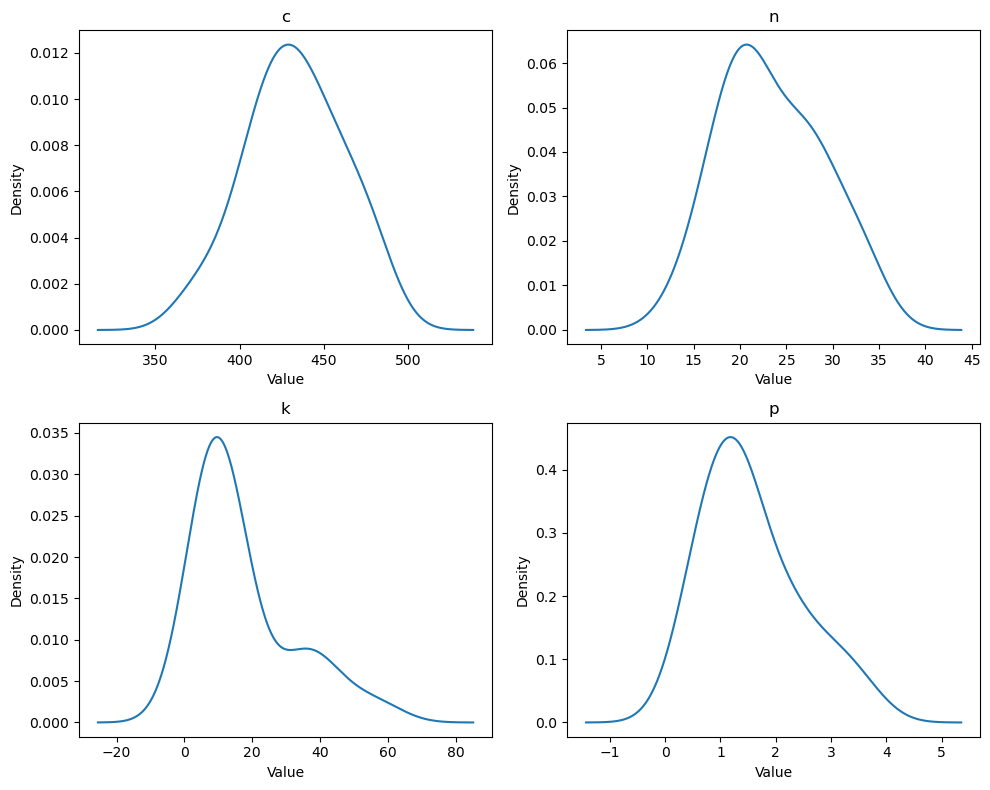

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, data.columns):
    data[col].dropna().plot(kind="kde", ax=ax)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

In [15]:
stats = data.agg(["mean", "std"])
print(stats)

               c          n          k         p
mean  432.777977  23.432839  17.186794  1.566588
std    28.524313   5.438389  14.665855  0.881621
